# DTW to Channels Identification

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

## HEVC - Channels

In [2]:
## Channels rtp e sportv, codec hevec, location pt
scenario1 = pd.read_csv("/IPTV_Datasets_28Jan/" + "dtw_scenario1" + ".csv")
sns.set_style('whitegrid')
scenario1.head()

,vpn1,vpn2,dtw,euclidian,path,cost_matrix,x,y,diagonal_dtw,diagonal_euclidian
0,tmplist6_pt_rtp1hevc_with_vpn_2oadc3vpbkx19ztc...,tmplist6_pt_rtp1hevc_with_vpn_2oadc3vpbkx19ztc...,0.000000,0.000000,"(array([ 0, 1, 2, 3, 4, 5, 6, 7...",[[0. 0.15051486 0.26167089 ... 0.11892...,166,166,166,166
1,tmplist6_pt_rtp1hevc_with_vpn_2oadc3vpbkx19ztc...,tmplist6_pt_rtp1hevc_with_vpn_58kgfkrtzbpyitvx...,20.885298,35.451620,"(array([ 0, 1, 2, 3, 4, 5, 6, 6...",[[0.13357956 0.01682496 0.12653747 ... 0.01458...,166,170,243,166
2,tmplist6_pt_rtp1hevc_with_vpn_2oadc3vpbkx19ztc...,tmplist6_pt_rtp1hevc_with_vpn_dm6jz8n3nxkxbybd...,19.489410,35.121098,"(array([ 0, 1, 1, 1, 1, 1, 1, 1...",[[0.38357924 0.22004591 0.17309838 ... 0.25381...,166,162,218,162
3,tmplist6_pt_rtp1hevc_with_vpn_2oadc3vpbkx19ztc...,tmplist6_pt_rtp1hevc_with_vpn_ey3ser35a7hvaqj3...,30.421616,2.152901,"(array([ 0, 0, 0, 1, 2, 3, 4, 5...",[[1.27057432e+00 1.14964148e+00 1.06839437e+00...,166,5,168,5
4,tmplist6_pt_rtp1hevc_with_vpn_2oadc3vpbkx19ztc...,tmplist6_pt_rtp1hevc_with_vpn_ia3geitkmujchp5d...,20.383694,32.662887,"(array([ 0, 1, 2, 3, 4, 5, 5, 5...",[[1.21991102 1.07374527 0.97360883 ... 1.10353...,166,155,212,155


In [4]:
scenario1['channel'] = ''
for index, row in scenario1.iterrows():
    if 'rtp1' in scenario1.at[index, 'vpn1'] and 'rtp1' in scenario1.at[index,'vpn2']:
        scenario1.at[index, 'channel'] = 'CH2'
    if 'sportv' in scenario1.at[index,'vpn1'] and 'sportv' in scenario1.at[index,'vpn2']:
        scenario1.at[index, 'channel'] = 'CH1'
    if 'sportv' in row['vpn1'] and 'rtp' in row['vpn2']:
        scenario1.at[index, 'channel'] = 'CH1_CH2'
    if 'rtp' in row['vpn1'] and 'sportv' in row['vpn2']:
        scenario1.at[index, 'channel'] = 'CH1_CH2'
scenario1_clean = scenario1.loc[(scenario1['dtw'] > 0)]
scenario1_clean.channel.value_counts()

CH1_CH2    1104
CH2         552
CH1         506
Name: channel, dtype: int64

* Create Swarmplots

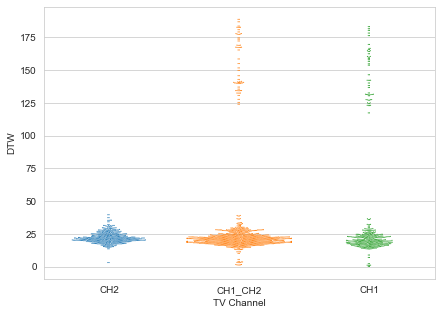

In [5]:
# Create plot with DTW
plt.figure(figsize=(7, 5))
sns_plot2 = sns.swarmplot(x='channel', y='dtw', data=scenario1_clean, size=1.1)
sns_plot2.set(xlabel = "TV Channel", ylabel = "DTW")
sns_plot2.figure.savefig("channels_hevc_dtw_db.png")

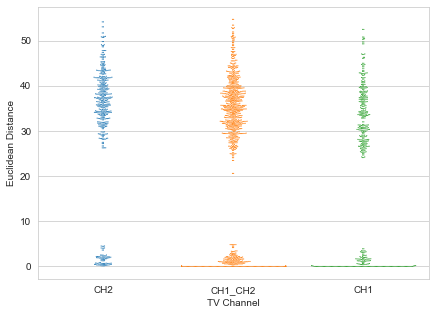

In [6]:
# Create plot with Euclidean Distance
plt.figure(figsize=(7, 5))
sns_plot2 = sns.swarmplot(x='channel', y='euclidean', data=scenario1_clean, size=1.1)
sns_plot2.set(xlabel = "TV Channel", ylabel = "Euclidean Distance")
sns_plot2.figure.savefig("channels_hevc_euclidean_db.png")

* Classification with Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x = scenario1_clean.loc[:, ['dtw']]
y = scenario1_clean.loc[:, ['channel']]
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=100)
clf_dtw = RandomForestClassifier(criterion='entropy', random_state=5, max_depth=40)
clf_dtw.fit(X_train, y_train)
y_pred = clf_dtw.predict(X_test)
print("Report : ", classification_report(y_test, y_pred))

/var/folders/s2/7lxn0z3n3rvd573277dx1dk40000gn/T/ipykernel_35915/70154391.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_dtw.fit(X_train, y_train)


Report :                precision    recall  f1-score   support

         CH1       0.84      0.86      0.85       114
     CH1_CH2       0.90      0.91      0.90       216
         CH2       0.92      0.88      0.90       103

    accuracy                           0.89       433
   macro avg       0.89      0.88      0.89       433
weighted avg       0.89      0.89      0.89       433



In [9]:
x = scenario1_clean.loc[:, ['euclidean']]
y = scenario1_clean.loc[:, ['channel']]
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=100)
clf_ed = RandomForestClassifier(criterion='entropy', random_state=5, max_depth=40)
clf_ed.fit(X_train, y_train)
y_pred = clf_ed.predict(X_test)
print("Report : ", classification_report(y_test, y_pred))

/var/folders/s2/7lxn0z3n3rvd573277dx1dk40000gn/T/ipykernel_35915/1025294574.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_ed.fit(X_train, y_train)


Report :                precision    recall  f1-score   support

         CH1       0.85      0.68      0.76       114
     CH1_CH2       0.80      0.91      0.85       216
         CH2       0.85      0.79      0.82       103

    accuracy                           0.82       433
   macro avg       0.83      0.79      0.81       433
weighted avg       0.82      0.82      0.82       433



In [11]:
x = scenario1_clean.loc[:, ['dtw','euclidean']]
y = scenario1_clean.loc[:, ['channel']]
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=100)
clf_both = RandomForestClassifier(criterion='entropy', random_state=5, max_depth=40)
clf_both.fit(X_train, y_train)
y_pred = clf_both.predict(X_test)
print("Report : ", classification_report(y_test, y_pred))

/var/folders/s2/7lxn0z3n3rvd573277dx1dk40000gn/T/ipykernel_35915/1058829077.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_both.fit(X_train, y_train)


Report :                precision    recall  f1-score   support

         CH1       0.94      0.86      0.90       114
     CH1_CH2       0.89      0.96      0.92       216
         CH2       0.92      0.84      0.88       103

    accuracy                           0.91       433
   macro avg       0.92      0.89      0.90       433
weighted avg       0.91      0.91      0.91       433



## H264 - Channels

In [12]:
## Channels rtp e sportv, codec h264, location pt
scenario2 = pd.read_csv("/IPTV_Datasets_28Jan/" + "dtw_scenario2" + ".csv")

vpn1 = scenario2['vpn1'].unique()
vpn2 = scenario2['vpn2'].unique()
all_files = np.unique([vpn1,vpn2])
df = pd.DataFrame(columns = all_files, index = all_files)

for index, i in scenario2.iterrows():
    for idx2, j in df.iterrows():
        for ind, column in enumerate(df.columns):
            if(idx2 == i['vpn1'] and column == i['vpn2']):
                j.loc[column] = i['dtw']
df.to_csv("/IPTV_Datasets_28Jan/" + "result_dtw_scenario2" + ".csv", index=True, header=True)
print(df.shape)

In [14]:
scenario2['channel'] = ''
for index, row in scenario2.iterrows():
    if 'rtp1' in scenario2.at[index, 'vpn1'] and 'rtp1' in scenario2.at[index,'vpn2']:
        scenario2.at[index, 'channel'] = 'CH2'
    if 'sportv' in scenario2.at[index,'vpn1'] and 'sportv' in scenario2.at[index,'vpn2']:
        scenario2.at[index, 'channel'] = 'CH1'
    if 'sportv' in row['vpn1'] and 'rtp' in row['vpn2']:
        scenario2.at[index, 'channel'] = 'CH1_CH2'
    if 'rtp' in row['vpn1'] and 'sportv' in row['vpn2']:
        scenario2.at[index, 'channel'] = 'CH1_CH2'
scenario2_clean = scenario2.loc[(scenario2['dtw'] > 0)]
scenario2_clean.channel.value_counts()

CH1_CH2    840
CH1        420
CH2        380
Name: channel, dtype: int64

* Create Swarmplots

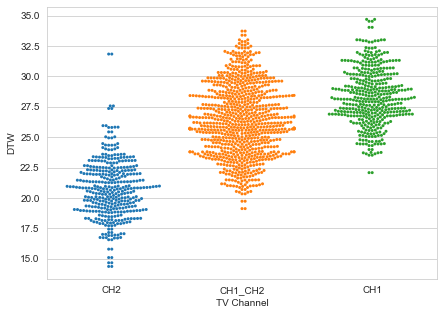

In [15]:
plt.figure(figsize=(7, 5))
cenario2_dtw_plot = sns.swarmplot(x='channel', y='dtw', data=scenario2_clean, size=3)
cenario2_dtw_plot.set(xlabel = "TV Channel", ylabel = "DTW")
cenario2_dtw_plot.figure.savefig("channels_h264_dtw_db.png")

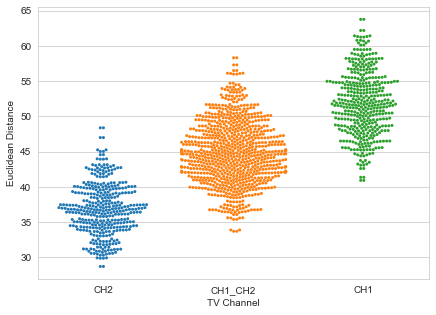

In [16]:
plt.figure(figsize=(7, 5))
cenario2_dtw_plot = sns.swarmplot(x='channel', y='euclidean', data=scenario2_clean, size=3)
cenario2_dtw_plot.set(xlabel = "TV Channel", ylabel = "Euclidean Distance")
cenario2_dtw_plot.figure.savefig("channels_h264_euclidean_db.png")

* Classification with Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x = scenario2_clean.loc[:, ['dtw']].values
y = scenario2_clean.loc[:, ['channel']].values
X_train, X_test, y_train, y_test = train_test_split(
            x, y, test_size=0.2, random_state=100)
clf = RandomForestClassifier(criterion='entropy', random_state=5, max_depth=40)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report : ", classification_report(y_test, y_pred))

/var/folders/s2/7lxn0z3n3rvd573277dx1dk40000gn/T/ipykernel_35915/2319457200.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Report :                precision    recall  f1-score   support

         CH1       0.89      0.89      0.89        76
     CH1_CH2       0.94      0.92      0.93       174
         CH2       0.93      0.97      0.95        78

    accuracy                           0.93       328
   macro avg       0.92      0.93      0.92       328
weighted avg       0.93      0.93      0.93       328



In [18]:
x = scenario2_clean.loc[:, ['euclidean']].values
y = scenario2_clean.loc[:, ['channel']].values
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=100)
clf = RandomForestClassifier(criterion='entropy', random_state=5, max_depth=40)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report : ", classification_report(y_test, y_pred))

/var/folders/s2/7lxn0z3n3rvd573277dx1dk40000gn/T/ipykernel_35915/2883279251.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Report :                precision    recall  f1-score   support

         CH1       1.00      0.92      0.96        76
     CH1_CH2       0.96      0.94      0.95       174
         CH2       0.89      1.00      0.94        78

    accuracy                           0.95       328
   macro avg       0.95      0.95      0.95       328
weighted avg       0.95      0.95      0.95       328



In [19]:
x = scenario2_clean.loc[:, ['dtw','euclidean']].values
y = scenario2_clean.loc[:, ['channel']].values
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=100)
clf = RandomForestClassifier(criterion='entropy', random_state=5, max_depth=40)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Report : ", classification_report(y_test, y_pred))


/var/folders/s2/7lxn0z3n3rvd573277dx1dk40000gn/T/ipykernel_35915/2447556207.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Report :                precision    recall  f1-score   support

         CH1       0.97      0.95      0.96        76
     CH1_CH2       0.98      0.95      0.97       174
         CH2       0.93      1.00      0.96        78

    accuracy                           0.96       328
   macro avg       0.96      0.97      0.96       328
weighted avg       0.96      0.96      0.96       328

